# P5_02_Testing
executé sur Colab

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
#install de glove
!pip install glove-python-binary

     |████████████████████████████████| 948 kB 5.0 MB/s 


In [3]:
#install de BERT
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.4 MB/s 
     |████████████████████████████████| 596 kB 42.8 MB/s 
     |████████████████████████████████| 880 kB 47.6 MB/s 
     |████████████████████████████████| 6.6 MB 26.8 MB/s 
     |████████████████████████████████| 77 kB 5.2 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=028d6b389ac62df9873a82a45557a8674add195008dc3a20f82e3fa7b10a8c84
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
!pip install pytorch_pretrained_bert

     |████████████████████████████████| 123 kB 5.3 MB/s 
     |████████████████████████████████| 132 kB 37.2 MB/s 
     |████████████████████████████████| 8.7 MB 33.5 MB/s 
     |████████████████████████████████| 79 kB 6.7 MB/s 
     |████████████████████████████████| 138 kB 33.4 MB/s 
     |████████████████████████████████| 127 kB 34.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
!pip install -q pyLDAvis

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done


In [6]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 5.5 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=3660766bafc2f08304f6aa14088c529c80b73bd71df944ddc343f64628d8eaa7
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.3.1
    Uninstalling pyLDAvis-3.3.1:
      Successfully uninstalled pyLDAvis-3.3.1


In [7]:
#import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
import pickle
import re
from scipy import sparse

#vectorisation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from glove import Glove
#import fasttext
from transformers import DistilBertTokenizer, DistilBertModel
from tqdm import tqdm
import torch

#modélisation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split


#lda
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import spacy

import pyLDAvis
import pyLDAvis.gensim
%matplotlib inline

#options
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_colwidth', -1)

In [1]:
#Import du fichier

In [9]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['export.csv']))

print(df.shape)
print(df.head(2))

(15884, 2)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Title_Body  \
0  ['set', 'editor', 'work', 'git', 'windows', 'try', 'git', 'windows', 'get', 'point', 'try', 'git', 'commit', 'get', 'error', 'terminal', 'dumb', 'visual', 'ed

In [10]:
#On supprime les caractères parasites pour pouvoir binariser notre target
df['Tags_old'] = df['Tags']
df['Title_Body_old'] = df['Title_Body']
char = ["'", "[", "]",","]
for text in char:
    df['Tags'] = df['Tags'].str.replace(text, '')
    df['Title_Body'] = df['Title_Body'].str.replace(text, '')

df = df[df.Tags!='']
df.reset_index(drop=True,inplace=True)

display(df.head(2))

,Title_Body,Tags,Tags_old,Title_Body_old
0,set editor work git windows try git windows get point try git commit get error terminal dumb visual editor define please supply message use either f option figure need environment variable call editor problem set point notepad work almost default commit message open notepad notepad support bare line feed go get notepad++ figure get notepad++ set editor way work git expect marry notepad++ point mind editor use want able type commit message editor rather command line use git windows tool use edit commit message make work,windows git,"['windows', 'git']","['set', 'editor', 'work', 'git', 'windows', 'try', 'git', 'windows', 'get', 'point', 'try', 'git', 'commit', 'get', 'error', 'terminal', 'dumb', 'visual', 'editor', 'define', 'please', 'supply', 'message', 'use', 'either', 'f', 'option', 'figure', 'need', 'environment', 'variable', 'call', 'editor', 'problem', 'set', 'point', 'notepad', 'work', 'almost', 'default', 'commit', 'message', 'open', 'notepad', 'notepad', 'support', 'bare', 'line', 'feed', 'go', 'get', 'notepad++', 'figure', 'get', 'notepad++', 'set', 'editor', 'way', 'work', 'git', 'expect', 'marry', 'notepad++', 'point', 'mind', 'editor', 'use', 'want', 'able', 'type', 'commit', 'message', 'editor', 'rather', 'command', 'line', 'use', 'git', 'windows', 'tool', 'use', 'edit', 'commit', 'message', 'make', 'work']"
1,angularjs http post send data could anyone tell follow statement send post data designate url url call server print post get empty array print message console add data show correct content http post request url message message also try data string outcome http post request url message + message seem work use follow format http method post url request url data message + message headers content type application x www form urlencoded way http post always include header order work believe content type specify format send data send javascript object,angularjs,['angularjs'],"['angularjs', 'http', 'post', 'send', 'data', 'could', 'anyone', 'tell', 'follow', 'statement', 'send', 'post', 'data', 'designate', 'url', 'url', 'call', 'server', 'print', 'post', 'get', 'empty', 'array', 'print', 'message', 'console', 'add', 'data', 'show', 'correct', 'content', 'http', 'post', 'request', 'url', 'message', 'message', 'also', 'try', 'data', 'string', 'outcome', 'http', 'post', 'request', 'url', 'message', '+', 'message', 'seem', 'work', 'use', 'follow', 'format', 'http', 'method', 'post', 'url', 'request', 'url', 'data', 'message', '+', 'message', 'headers', 'content', 'type', 'application', 'x', 'www', 'form', 'urlencoded', 'way', 'http', 'post', 'always', 'include', 'header', 'order', 'work', 'believe', 'content', 'type', 'specify', 'format', 'send', 'data', 'send', 'javascript', 'object']"


## 1. Approche supervisée : Feature Engineering et modélisation

### 1.1 Transformation de la target "Tags"<a class="anchor" id="1.1"></a>

In [11]:
mlb = MultiLabelBinarizer()

y = pd.DataFrame(mlb.fit_transform(df['Tags'].str.split(" ")),columns=mlb.classes_)

print(display(y.shape))
print(display(y.head(2)))

(15879, 36)

None


,android,angularjs,array,asp,bash,c,c#,c++,css,database,...,php,python,r,rail,ruby,server,sql,string,studio,windows
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


None


### 1.2 Vectorisation et modélisation

#### 1.2.1 Features Engineering

In [12]:
X = df['Title_Body']

##### A CountVectorizer

In [40]:
#CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

X_CV = count_vectorizer.fit_transform(X)

print(X_CV.shape)

(15879, 15225)


##### B GloVe Embeddings

In [41]:
#TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

X_TFIDF = tfidf_vectorizer.fit_transform(X)

print(X_TFIDF.shape)

(15879, 15225)


##### C Word2VEC: 
###### GloVe Embeddings

In [13]:
#Création du modèle Glove : on le joue qu'une fois puis on sauvegarde le modèle

stop = [",", ";", ".", "?", "!", "'", ":", "*", "/", "\n", "(", ")", "|", "_", "`",">","<","=", "$", "%", '"', "[","]","{","}","-"]

lines_without_stopwords=[] 
for line in df['Title_Body'].values: 
    line = line.lower()
    line_by_words = re.split(r'(?:\s+)', line, flags = re.UNICODE)
    new_line=[]
    for word in line_by_words:
        if word not in stop:
            new_line.append(word)
    lines_without_stopwords.append(new_line)
texts = lines_without_stopwords

from glove import Corpus, Glove

corpus = Corpus()
glove = Glove(no_components=100, learning_rate=0.05)

corpus.fit(texts, window=10)

glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save('API/glove.model')

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [14]:
#Import du modèle Glove
model_glove = Glove.load('API/glove.model')

vector = {word: model_glove.word_vectors[model_glove.dictionary[word]] for word in model_glove.dictionary.keys()}
X_glove = []

for i in range(0,X.shape[0]):
  phrase = re.split(r'(?:\s+)',X[i])
  feat = sum(vector[w] for w in phrase)
  X_glove.append(feat)

X_glove = np.vstack(X_glove)
X_glove.shape

(15879, 100)

##### D BERT Embeddings

In [15]:
from transformers import DistilBertTokenizer, DistilBertModel
from transformers import logging

logging.set_verbosity_warning()

from transformers import logging
logging.set_verbosity_error()

tokenizer_db = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

In [16]:
#*****
from transformers import DistilBertTokenizer, DistilBertModel
import torch
MODEL_NAME = 'distilbert-base-uncased'

from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
def sentence_input(sentence: str, max_len: int = 512, device = 'cpu'):
    encoded = tokenizer.encode_plus(sentence, add_special_tokens=True, 
                                    pad_to_max_length=True, max_length=max_len, 
                                    return_tensors="pt",).to(device)
    model_input = (encoded['input_ids'], encoded['attention_mask'])
    return model_input

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [17]:
model.cuda()
print("GPU found!")
gpu_detected = 1

GPU found!


In [18]:
content_data_ids = df['Title_Body'].str.slice(0, 500).str.lower().apply(tokenizer_db.encode)

In [19]:
content_data_vectors = []

for cnt_data in content_data_ids:
  input_ids = torch.Tensor(cnt_data).to(torch.int64).unsqueeze(0)
  if gpu_detected == 1:
    outputs = model(input_ids.cuda())
    content_data_vectors.append(outputs[0].detach().cpu().numpy().max(axis = 1))

In [21]:
X_bert = np.vstack(content_data_vectors)

In [22]:
X_bert.shape

(15879, 768)

In [23]:
pip install transformers

In [24]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers

#from transformers import *
import os
os.environ['TF_KERAS'] = '1'


In [25]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.8.0
2.8.0
Num GPUs Available:  1
True


In [26]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [27]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [28]:
##
batch_size = 10
#sentences = data_T['sentence_dl'].to_list()
sentences = df['Title_Body'].to_list() #.str.slice(0, 500).str.lower().apply(tokenizer_db.encode)

In [29]:
features_USE = feature_USE_fct(sentences, batch_size)

In [30]:
features_USE.shape

(15870, 512)

In [31]:
X_USE = features_USE

#### 1.2.2 Réduction de dimension

In [32]:
def simulation_components(X, n_begin, n_end, step):
  var_cum = []

  for components in range(n_begin,n_end,step):
    tsvd = TruncatedSVD(n_components=components)
    X_tsvd = tsvd.fit(X)
    var_cum.append([components,sum(tsvd.explained_variance_ratio_)])

  df_var_cum = pd.DataFrame(var_cum,columns=['n_components','variance'])
  df_var_cum.plot.line('n_components','variance')
  plt.show

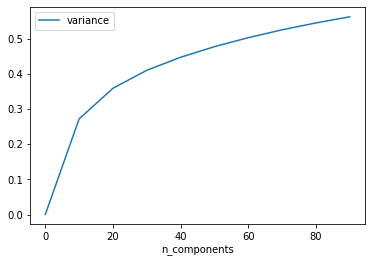

In [42]:
#X_CV
simulation_components(X_CV, 0, 100, 10)

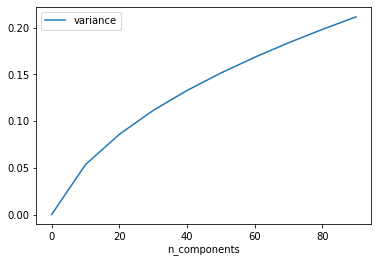

In [43]:
#X_TFIDF
simulation_components(X_TFIDF, 0, 100, 10)

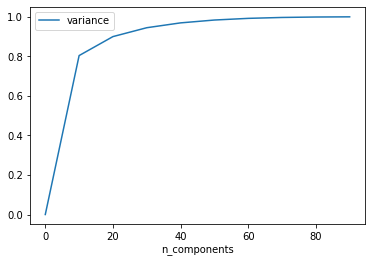

In [33]:
#Glove
simulation_components(X_glove, 0, 100, 10)

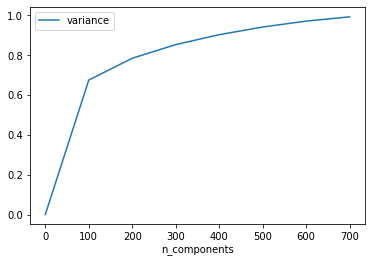

In [34]:
#Bert
simulation_components(X_bert, 0, 800, 100)

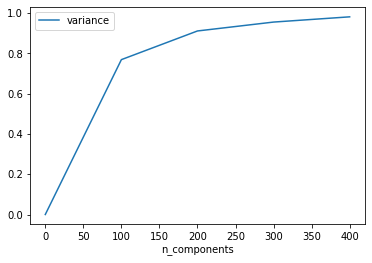

In [35]:
#USE
simulation_components(X_USE, 0, 500, 100)

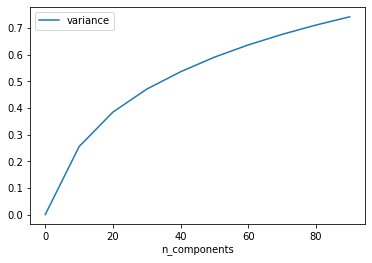

In [36]:
simulation_components(X_USE, 0, 100, 10)


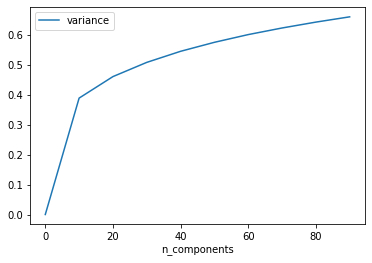

In [37]:
simulation_components(X_bert, 0, 100, 10)

###### F Comparaison

En comparent les figures, nous constatons que sur un même échelle, X_CV présente le meilleur Varience.

## 1.2 Modélisation

In [44]:
# Modélisation
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import jaccard_score

#modélisation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

# list of unique tags
categories = list(y.columns.values)

# list of metrics used to compare model performance
scores = ['f1','accuracy','precision','recall','fitting_duration', 'jaccard']



#### importer les classifieurs

In [77]:
#### import des classifieurs
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#### train test split

In [79]:
#X_CV, X_glove, X_bert, X_use
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_CV, y, test_size=0.2, random_state=42)
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(X_bert, y, test_size=0.2, random_state=42)
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X_glove, y, test_size=0.2, random_state=42)
#X_train_use, X_test_use, y_train_use, y_test_use = train_test_split(X_USE, y, test_size=0.2, random_state=42)


##### Comparison des metrics des X_CV, X_glove et X_Bert sur un même classifieur LinearSCV

In [81]:
#Metrics
#LinearSVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
clf = MultiOutputClassifier(LinearSVC(random_state=0, tol=1e-5),n_jobs=-1)
start = time.time()
clf.fit(X_train_cv,y_train_cv)
end = time.time()

In [83]:
prediction = clf.predict(X_test_cv)

In [84]:
LinearSVC_CV = pd.DataFrame(columns=scores)

f1 = []
accuracy = []
precision = []
recall = []
jaccard = []
f1.append(f1_score(y_test_cv,prediction,average='weighted'))
accuracy.append(accuracy_score(y_test_cv,prediction))
precision.append(precision_score(y_test_cv,prediction,average='weighted'))
recall.append(recall_score(y_test_cv,prediction,average='weighted'))
#recall.append(recall_score(y_test,prediction,average='weighted'))
jaccard.append(jaccard_score(y_test_cv,prediction,average='weighted')) #jaccard_score(y_pred, y_test,average='macro')*100

LinearSVC_CV['f1']=f1
LinearSVC_CV['accuracy']=accuracy
LinearSVC_CV['precision']=precision
LinearSVC_CV['recall'] = recall
LinearSVC_CV['jaccard'] = jaccard
LinearSVC_CV['fitting_duration'] = end-start

In [87]:
print("X_CV: metrics_results")
LinearSVC_CV

X_CV: metrics_results


,f1,accuracy,precision,recall,fitting_duration,jaccard
0,0.689878,0.465365,0.687076,0.695872,9.629785,0.55369


In [89]:
#glove
clf.fit(X_train_glove,y_train_glove)
end = time.time()

prediction = clf.predict(X_test_glove)

LinearSVC_glove = pd.DataFrame(columns=scores)

f1 = []
accuracy = []
precision = []
recall = []
jaccard = []
f1.append(f1_score(y_test_glove,prediction,average='weighted'))
accuracy.append(accuracy_score(y_test_glove,prediction))
precision.append(precision_score(y_test_glove,prediction,average='weighted'))
recall.append(recall_score(y_test_glove,prediction,average='weighted'))
#recall.append(recall_score(y_test,prediction,average='weighted'))
jaccard.append(jaccard_score(y_test_glove,prediction,average='weighted')) #jaccard_score(y_pred, y_test,average='macro')*100

LinearSVC_glove['f1']=f1
LinearSVC_glove['accuracy']=accuracy
LinearSVC_glove['precision']=precision
LinearSVC_glove['recall'] = recall
LinearSVC_glove['jaccard'] = jaccard
LinearSVC_glove['fitting_duration'] = end-start

print("X_Glove: metrics_results")
LinearSVC_glove


X_Glove: metrics_results


,f1,accuracy,precision,recall,fitting_duration,jaccard
0,0.555085,0.305101,0.655955,0.52156,869.113133,0.411109


In [90]:
#bert
clf.fit(X_train_glove,y_train_glove)
end = time.time()

prediction = clf.predict(X_test_glove)

LinearSVC_bert = pd.DataFrame(columns=scores)

f1 = []
accuracy = []
precision = []
recall = []
jaccard = []
f1.append(f1_score(y_test_bert,prediction,average='weighted'))
accuracy.append(accuracy_score(y_test_bert,prediction))
precision.append(precision_score(y_test_bert,prediction,average='weighted'))
recall.append(recall_score(y_test_bert,prediction,average='weighted'))
#recall.append(recall_score(y_test,prediction,average='weighted'))
jaccard.append(jaccard_score(y_test_bert,prediction,average='weighted')) #jaccard_score(y_pred, y_test,average='macro')*100

LinearSVC_bert['f1']=f1
LinearSVC_bert['accuracy']=accuracy
LinearSVC_bert['precision']=precision
LinearSVC_bert['recall'] = recall
LinearSVC_bert['jaccard'] = jaccard
LinearSVC_bert['fitting_duration'] = end-start

print("X_bert: metrics_results")
LinearSVC_bert

X_bert: metrics_results


,f1,accuracy,precision,recall,fitting_duration,jaccard
0,0.555085,0.305101,0.655955,0.52156,983.213302,0.411109


##### La meilleure extraction était avec X_CV 

In [92]:
print("Les meilleurs résultats ont été avec : X_CV")
print("Maintenant je teste d'autes classifieurs : Logistic regression et MNB")

Les meilleurs résultats ont été avec : X_CV
Maintenant je teste d'autes classifieurs : Logistic regression et MNB


# Tester sur deux autres classifieurs: LogisticRegression et MultinomialNB

puis comparer les metrics avec celles données par LinearSVC

In [95]:
#Logistic Regression
clf = MultiOutputClassifier(LogisticRegression(max_iter=500,tol=1e-5),n_jobs=-1)
start = time.time()
clf.fit(X_train_cv,y_train_cv)
end = time.time()

In [96]:
prediction = clf.predict(X_test_cv)

In [97]:
Logistic_regression_CV=pd.DataFrame(columns=scores)

f1 = []
accuracy = []
precision = []
recall = []
jaccard = []
f1.append(f1_score(y_test_cv,prediction,average='weighted'))
accuracy.append(accuracy_score(y_test_cv,prediction))
precision.append(precision_score(y_test_cv,prediction,average='weighted'))
recall.append(recall_score(y_test_cv,prediction,average='weighted'))
jaccard.append(jaccard_score(y_test_cv,prediction,average='weighted'))

Logistic_regression_CV['f1']=f1
Logistic_regression_CV['accuracy']=accuracy
Logistic_regression_CV['precision']=precision
Logistic_regression_CV['recall'] = recall
Logistic_regression_CV['jaccard'] = jaccard
Logistic_regression_CV['fitting_duration'] = end-start

print("X_CV: LR_metrics")
Logistic_regression_CV

X_CV: LR_metrics


,f1,accuracy,precision,recall,fitting_duration,jaccard
0,0.708653,0.506927,0.77715,0.655963,21.809539,0.575302


In [103]:
#MultinomailNB
clf = MultiOutputClassifier(MultinomialNB())
start = time.time()
clf.fit(X_train_cv,y_train_cv)
end = time.time()

prediction = clf.predict(X_test_cv)


MNB_CV=pd.DataFrame(columns=scores)

f1 = []
accuracy = []
precision = []
recall = []
jaccard = []
f1.append(f1_score(y_test_cv,prediction,average='weighted'))
accuracy.append(accuracy_score(y_test_cv,prediction))
precision.append(precision_score(y_test_cv,prediction,average='weighted'))
recall.append(recall_score(y_test_cv,prediction,average='weighted'))
jaccard.append(jaccard_score(y_test_cv,prediction,average='weighted'))

MNB_CV['f1']=f1
MNB_CV['accuracy']=accuracy
MNB_CV['precision']=precision
MNB_CV['recall'] = recall
MNB_CV['jaccard'] = jaccard
MNB_CV['fitting_duration'] = end-start

print("X_CV:MultinomialNB_metrics")
MNB_CV

X_CV: LR_metrics


,f1,accuracy,precision,recall,fitting_duration,jaccard
0,0.594454,0.362091,0.489434,0.779817,0.385985,0.443976


### Meilleur classifieur

In [104]:
print("Le meilleur classifieur est le Logistic Regression")

Le meilleur classifieur est le Logistic Regression


## 1.3. Optimiser le meilleur modéle supervisé

In [114]:
#Meilleur Modéle
X_train, X_test, y_train, y_test = train_test_split(X_CV, y, test_size=0.2, random_state=42) 

In [115]:
#GridSearchCV
from time import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

t0 = time()
pipeline = Pipeline([('clf', MultiOutputClassifier(LogisticRegression()))])
parameters = {
     "clf__estimator__C": np.arange(1,20,2),     
     "clf__estimator__max_iter":[1000, 10000, 20000]
}

model_tunning = GridSearchCV(pipeline, parameters, cv=3, scoring='accuracy')
model_tunning.fit(X_train, y_train)

print ("Accuracy Score: ", accuracy_score(y_test, model_tunning.best_estimator_.predict(X_test)))
print("done in %0.3fs." % (time() - t0))
model_tunning.best_estimator_

Accuracy Score:  0.506926952141058
done in 2708.113s.


Pipeline(steps=[('clf',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1,
                                                                    max_iter=1000)))])

In [117]:
print ('Accuracy Score:  0.506926952141058 done in 2708.113s.Pipeline(steps=[(clf, MultiOutputClassifier(estimator=LogisticRegression(C=1,max_iter=1000)))])')

Accuracy Score:  0.506926952141058 done in 2708.113s.Pipeline(steps=[(clf, MultiOutputClassifier(estimator=LogisticRegression(C=1,max_iter=1000)))])


In [118]:
model = LogisticRegression(max_iter=1000, C= 1)

In [119]:
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(model)

clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1, max_iter=1000))

##### Sauvegarde des fichier PKL

In [121]:
#Sauvegarde du modèle
filename = 'API/model_lr.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [122]:
#Sauvegarde de la vectorisation
filename = 'API/vectorization.pkl'
pickle.dump(count_vectorizer, open(filename, 'wb'))

In [123]:
#Sauvegarde de la binarisation
filename = 'API/multiLabBin.pkl'
pickle.dump(mlb, open(filename, 'wb'))

##### Comparaison des Tags testés/prédits

In [126]:
#Comparaison des Tags testés/prédits
test1 = mlb.inverse_transform(np.array(y_test))
pred1 = mlb.inverse_transform(prediction)#y_pred)

comparaison = pd.DataFrame(columns=['Test','Prediction'])

comparaison['Test'] = test1
comparaison['Prediction'] = pred1

comparaison.head(5)

,Test,Prediction
0,"(php, string)",()
1,"(c#,)",()
2,"(javascript, jquery)","(css, html, javascript, jquery)"
3,"(database, sql)","(database,)"
4,"(c,)","(c, c++)"


# 2. APPROCHE NON SUPERVISEE LDA

In [127]:
df_lda = pd.DataFrame(df['Title_Body'])

In [128]:
def topics(model, num_topics):
    for id_topic, topic in model.show_topics(formatted=False, num_topics=num_topics, num_words= 10):
        print("******************************************")
        print("Topic %d:" % (id_topic))
        print(" ".join([w[0] for w in topic]))

In [129]:
corpus = []
for i, row in df_lda.iterrows():
    line = row["Title_Body"]
    corpus.append(line)

In [130]:
data_token = [text.split() for text in corpus]

In [131]:
dictionary = Dictionary(data_token)

In [132]:
bow = [dictionary.doc2bow(text) for text in data_token]

In [133]:
perplexity = []
coherence = []

param = [15,20,25,30,35,40]

for n in param:
    model_lda = LdaModel(bow, num_topics=n, id2word=dictionary)
    perplexity.append(model_lda.log_perplexity(bow))
    coherence.append(CoherenceModel(model=model_lda, texts=data_token, dictionary=dictionary, coherence='c_v').get_coherence())

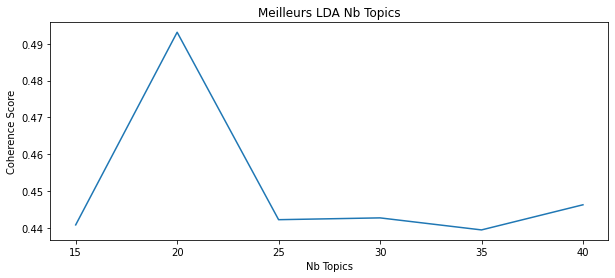

In [134]:
plt.figure(figsize=(10, 4))

plt.plot(param, coherence, label='coherence')

plt.title("Meilleurs LDA Nb Topics")
plt.xlabel("Nb Topics")
plt.ylabel("Coherence Score")
plt.show()

In [135]:
ldaModel = LdaModel(bow, num_topics=20, id2word=dictionary)

In [136]:
topics(ldaModel,20)

******************************************
Topic 0:
value name list id select mysql user query row get
******************************************
Topic 1:
array div class list function value element use id li
******************************************
Topic 2:
x java exception + try internal c print eclipse time
******************************************
Topic 3:
line use string read character code vector n way c
******************************************
Topic 4:
use would request like get data python need time web
******************************************
Topic 5:
android string layout public id java new view null r
******************************************
Topic 6:
file run use command script commit change git want work
******************************************
Topic 7:
function input scope angularjs form type new use value ng
******************************************
Topic 8:
width image height css div px size color view style
******************************************
Topic 9:

In [137]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldaModel, bow, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
14     0.041694  0.094358  1       1        8.244779
4      0.093238  0.040930  2       1        7.872806
6      0.130915 -0.018743  3       1        7.459946
16    -0.043224  0.063935  4       1        7.171583
13     0.164421 -0.075824  5       1        6.460104
9     -0.023554 -0.172546  6       1        5.692504
0     -0.091083  0.080313  7       1        5.515188
19    -0.074555  0.080649  8       1        5.328092
8     -0.123084 -0.163300  9       1        5.265722
17     0.130980 -0.088377  10      1        5.165849
5     -0.174160 -0.182058  11      1        4.820662
1     -0.145736  0.047176  12      1        4.588652
18     0.084176  0.042724  13      1        4.002186
2      0.012683  0.068763  14      1        3.750293
3      0.024461  0.094170  15      1        3.745838
12    -0.098829  0.098034  16      1        3.581162
11     0.137853 -0.075283  17      1        3.389823
7     -0.124038  0.025539  18      1        3.262110
15     0.026852 -0.011946  19      1        2.445857
10     0.050987  0.051488  20      1        2.236841, topic_info=        Term         Freq        Total Category  logprob  loglift
274  android  6660.000000  6660.000000  Default  30.0000  30.0000
293  file     8212.000000  8212.000000  Default  29.0000  29.0000
19   git      3961.000000  3961.000000  Default  28.0000  28.0000
587  class    5550.000000  5550.000000  Default  27.0000  27.0000
86   string   4630.000000  4630.000000  Default  26.0000  26.0000
..      ...           ...          ...      ...      ...      ...
50   add      110.517063   3176.425296  Topic20 -5.3685   0.4418 
222  new      106.432217   4924.846743  Topic20 -5.4062  -0.0344 
427  draw     84.169826    273.794954   Topic20 -5.6409   2.6206 
130  c        88.092892    3511.759382  Topic20 -5.5953   0.1146 
41   type     85.733042    3115.646139  Topic20 -5.6225   0.2072 

[1582 rows x 6 columns], token_table=      Topic      Freq Term
term                      
126   2      0.034645  #  
126   3      0.121740  #  
126   4      0.054855  #  
126   5      0.329130  #  
126   6      0.010105  #  
...  ..           ... ..  
3737  19     0.984487  │  
3738  10     0.042999  └──
3738  19     0.945970  └──
3739  10     0.018627  ├──
3739  19     0.977923  ├──

[8326 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 5, 7, 17, 14, 10, 1, 20, 9, 18, 6, 2, 19, 3, 4, 13, 12, 8, 16, 11])

##### Sauvegarde du dictionnaire et du modéle LDA: fichier PKL

In [138]:
#Sauvegarde du dico
filename = 'API/dictionnary.pkl'
pickle.dump(dictionary, open(filename, 'wb'))

In [139]:
#Sauvegarde du modèle LDA
filename = 'API/model_lda.pkl'
pickle.dump(ldaModel, open(filename, 'wb'))

## 3 Fonction de prediction

In [140]:

import pandas as pd
import numpy as np
from operator import itemgetter
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

import re
import nltk
from nltk.stem.snowball import EnglishStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [141]:
def lower_case(text):
  return text.lower()

def rm_bad_character(text):
  char = [",", ";", ".", "?", "!", "'", ":", "*", "/", "\n", "(", ")", "|", "_", "`",">","<","=", "$", "%", '"', "[","]","{","}","-"]
  dig = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
  for word in char:
    text = text.replace(word,'')
  for num in dig:
    text = text.replace(num,'')
  return text

def rm_stopwords(text):
  stop_list = stopwords.words('english')
  tokenizer = nltk.RegexpTokenizer('\s+', gaps=True)
  doc = tokenizer.tokenize(text)
  words = [item for item in doc if item not in stop_list]
  return ' '.join(words)

def lem(text):
  tokenizer = nltk.RegexpTokenizer('\s+', gaps=True)
  lemmatizer = WordNetLemmatizer()
  doc = tokenizer.tokenize(text)
  words = [lemmatizer.lemmatize(y, pos='v') for y in doc]
  return ' '.join(words)


In [142]:
def cleansing(text):
    text = lower_case(text)
    text = rm_bad_character(text)
    text = rm_stopwords(text)
    text = lem(text)
    return text

In [143]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [144]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [145]:
clf = pickle.load(open('API/model_lr.pkl', 'rb'))
mlb = pickle.load(open('API/multiLabBin.pkl', 'rb'))
vector = pickle.load(open('API/vectorization.pkl', 'rb'))
ldaModel = pickle.load(open('API/model_lda.pkl', 'rb'))
dictionnary = pickle.load(open('API/dictionnary.pkl', 'rb'))

In [146]:
def make_prediction(title,body):
  #on fusionne le title et le body
  full_text = title+' '+body

  #on nettoie notre data
  text_clean = cleansing(full_text)

  #Partie prédiction supervisée
  #on insère notre résultat dans une liste pour effectuer les opérations suivantes
  l = []
  l.append(text_clean)

  #on vectorise
  input_to_pred = vector.transform(l)

  #on passe à la prédiction
  input_pred = clf.predict(input_to_pred)

  #on récupère la ou les valeurs prédites
  output = mlb.inverse_transform(input_pred)

  #Partie prédiction non supervisée
  #création du BOW à partir du dictionnaire
  bow = dictionnary.doc2bow(text_clean.split())

  #on récupère le meilleur topic
  best_topic = max(ldaModel.get_document_topics(bow),key=itemgetter(1))[0]

  #on récupère les 3 premiers keywors
  keywords = [x[0] for x in ldaModel.show_topic(best_topic, topn=3)]

  print(output)
  print(keywords)

#### Test par tournage à la main

In [147]:
body='I have been developing a private python package (my first py package) and want to change the name while retainng all my git commits.I formatted it in a similar way to Cookie Cutter Data Science where all the code lives in the src dir. This has been fine while building but when upload it to a server or another computer I don''t want to have to call it like... from src.data import * I have tried just renaming it using git mv src/ newname/ but when I push this change to Github all my files are lost (i know they are there but I would prefer to easily see all my past changes). I shared it in the form of a .whl file. So do I just have to rename it and deal with loosing the changes? Or is there a different git command to use. Or is there some configuration in the setup.py file i can do? Here is my setup.py for reference.'
title='Change private python package name while retaining git history'

In [148]:
make_prediction(title,body)

[('git', 'python')]
['file', 'run', 'use']
